# Solution of Programming Exercise 5 - Group N

Authors:  Jairo R. Mejia and Pablo Gomez Hidalgo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from typing import Tuple
from scipy.io import loadmat

We define the algorithm of *Principal component Analysis* according to the description sheet

**Remark:**
The error given during this algorithm is not the same that shows the description of the task, this would lead to a number that does not show the behavior of the dataset. Instead we use follow the concept of *Scree Plot*.

In [2]:
def PCA(X : np.ndarray, n_components : int) -> Tuple[np.ndarray, float]:
    """Applies PCA

    Args:
        X (N x D array): original data
        n_components (int): number of principal components

    Returns:
        reconstruct_dataset (N x D array): approx reconstruction
        error: reconstructed error
    """
    N = X.shape[0]
    D = X.shape[1]
    mean = X.mean(0)
    sigma = np.cov(X, ddof = 1, rowvar = False)
    eig_vals, eig_vectors = np.linalg.eig(sigma)
    sorted_eig_vals = eig_vals[np.argsort(eig_vals)[::-1]]
    sorted_eig_vectors = eig_vectors[: , np.argsort(eig_vals)[::-1]]
    matrixE = sorted_eig_vectors[:, 0 : n_components]
    
    reconstruct_dataset = np.zeros([N, D])
    lower_dimension_dataset = np.zeros([N, n_components])
    for i in range(N):
        lower_dimension_dataset[i] = (matrixE.T  @ (np.subtract(X[i], mean)))
        reconstruct_dataset[i] = mean + matrixE @ lower_dimension_dataset[i]
    
    error = np.sum(sorted_eig_vals[n_components:]) / np.sum(sorted_eig_vals)
    return reconstruct_dataset, error
    

We import the dataset and start the PCA analysis to recover after the lower dimension transformation the image and we plot the pair images to see the changes

The error is:  0.16590024031370557


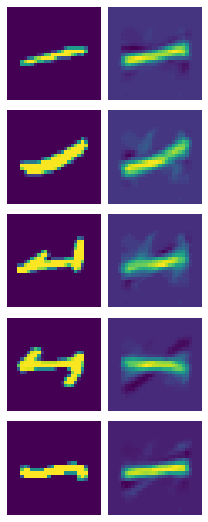

In [3]:
# Constants to run the algorithm
NUM_FIGS = 5
NUM_COMPONENTS = 5

# Import the digit database
db = loadmat("digit_database/ones.mat")

# Get the data to make the PCA
X = db['X']
recon_X, error = PCA(X, NUM_COMPONENTS)

print ("The error is: ", error)

# seed random number generator
np.random.seed(1)
# generate some integers
random_imgs = np.random.randint(0, 100, NUM_FIGS)

# Show some images
fig = plt.figure(figsize=(4, 1.6 * NUM_FIGS))
gs = gridspec.GridSpec(NUM_FIGS, 2, width_ratios=[1, 1], wspace=0.08, hspace=0.0, top=0.95, bottom=0.05, left=0.17, right=0.845) 
fig_num = 0
for i in random_imgs:
    original_img = X[:,i].reshape(28,28)
    recon_img = recon_X[:,i].reshape(28,28)
    
    # Set the plots
    axs = plt.subplot(gs[fig_num, 0])
    axs.imshow(original_img)
    axs.axis('off')
    
    axs = plt.subplot(gs[fig_num, 1])
    axs.imshow(recon_img)
    axs.axis('off')
    
    fig_num = fig_num + 1